# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


c:\Users\andyv\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


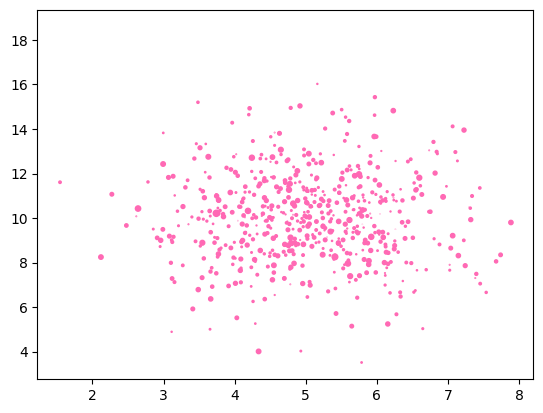

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)
size  = np.random.normal(1, 5, 1000)

# Bodový graf
plt.scatter(x, y, color = 'hotpink', s = size)


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


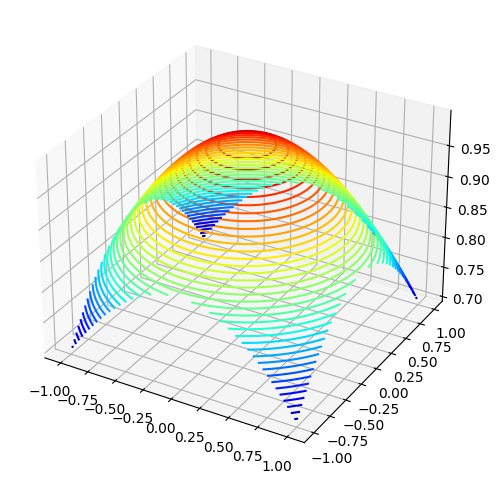

In [2]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,6))
x = np.linspace(-1,1, 1000)
y = np.linspace(-1,1, 1000)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)

ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 40, cmap='jet')
plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


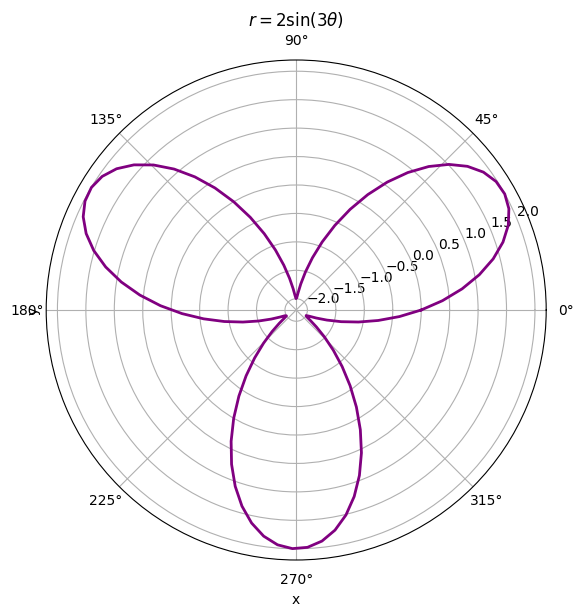

In [3]:
import math
fig = plt.figure(figsize=(5,5))

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, 1, 1], polar=True)
x = np.linspace(0, 2 * math.pi, 100)
y = 2*np.sin(3*x)

# Jednoduchá spirála
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$r = 2\sin(3θ)$')
ax.plot(x, y, color='purple', lw=2)


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


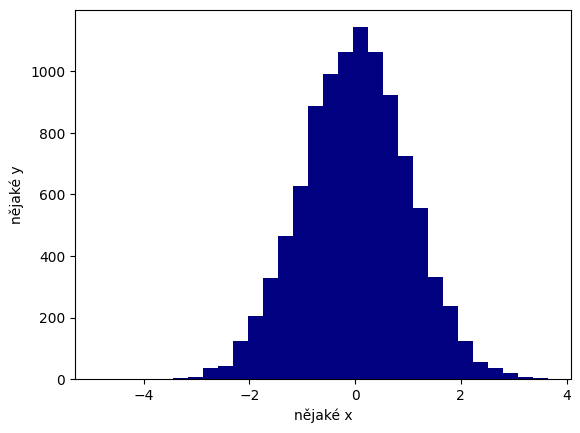

In [4]:
fig ,ax = plt.subplots()
n = np.random.randn(10000)     # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 30, color = 'navy') 
ax.set_xlabel('nějaké x')
ax.set_ylabel('nějaké y')
plt.show()


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


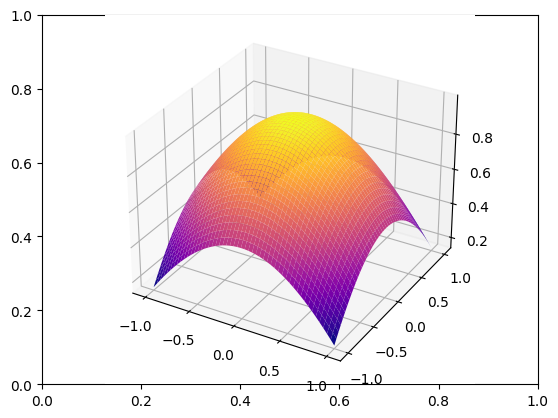

In [5]:
fig, ax = plt.subplots()
x = np.linspace(-1,1, 1000)
y = np.linspace(-1,1, 1000)
x, y = np.meshgrid(x,y)
z = np.cos(np.sqrt(x**2+y**2))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='plasma')
plt.show()

# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`. 
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?

In [6]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    A= np.zeros((n+2,n+2))
    s = int(n/2) + 1
    A[s,s] = 1
    for i in range(s):
        a = np.arange((i)*2)+((i)**2-(i-1)**2)**2+1
        if i>0:
            A[s-i,s-i:s+i]= a[::-1]
            a += i*2
            A[s-i+1:s+i+1,s-i]= a
            a += i*2
            A[s+i,s-i+1:s+i+1]= a
            a += i*2
            A[s-i:s+i,s+i]= a[::-1]
    # print(A)
    return(A[1:-1, 1:-1])
    pass

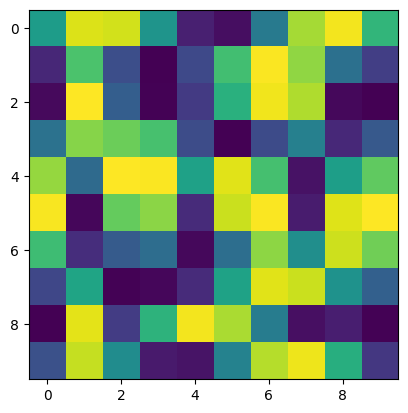

In [7]:
x = integer_spiral(10)
y = np.sin(x)

plt.imshow(y)


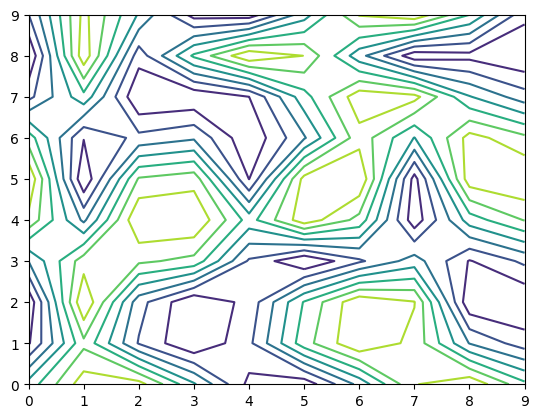

In [8]:
plt.contour(y)

In [10]:
from time import time as tm

In [34]:
integer_spiral_numpy_tm = []
integer_spiral_tm = []

for i in range(11,1001,2):
    t1=tm()
    integer_spiral_numpy(i)
    t2=tm()
    integer_spiral_numpy_tm.append(t2-t1)
    t1=tm()
    integer_spiral(i)
    t2=tm()
    integer_spiral_tm.append(t2-t1)

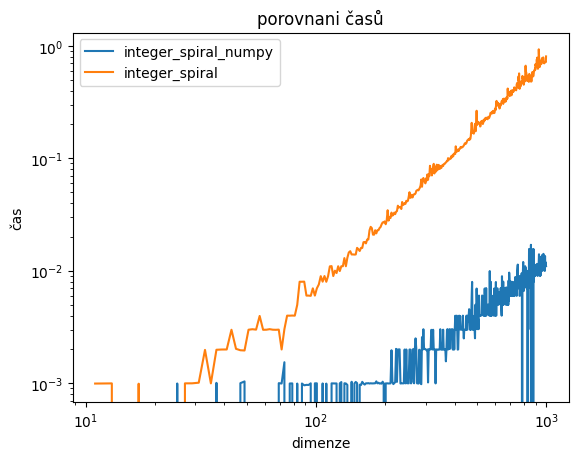

In [39]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('čas')
ax.set_xlabel('dimenze')
ax.set_title('porovnani časů')
ax.plot(np.arange(11,1001,2),integer_spiral_numpy_tm, label= "integer_spiral_numpy")
ax.plot(np.arange(11,1001,2), integer_spiral_tm, label="integer_spiral")
ax.legend(loc=2)
plt.show()

**co vypovídají tyto grafy o výpočetních náročnostech obou funkcí?** 
* výpočetní rychlost je u numpy spirály kratší

**co reprezentuje sklon lineárního grafu v log-log grafu?**
* exponenciální závislost

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.